<a href="https://colab.research.google.com/github/Yxy-0/TAM_2025-2S/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Importamos librerías principales
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Definimos número de muestras (N) y número de características (P)
N = 1000
P = 20

# Generamos un dataset sintético de regresión lineal
X,y = make_regression(n_samples=N, n_features=P, noise=0.1, random_state=42)

# Mostramos las dimensiones de los datos
print("Forma de X:", X.shape)  # (1000, 20)
print("Forma de y:", y.shape)  # (1000,)


Forma de X: (1000, 20)
Forma de y: (1000,)


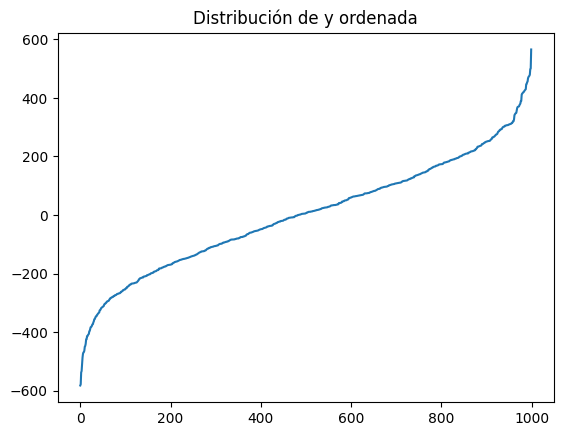

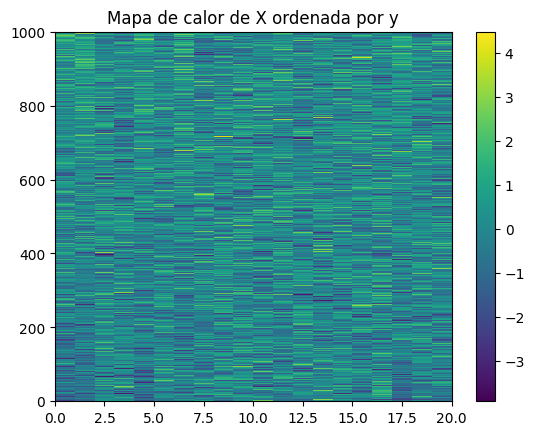

In [15]:
# Visualizamos los valores de y ordenados
plt.plot(np.sort(y))
plt.title("Distribución de y ordenada")
plt.show()

# Ordenamos índices según y
ind_ = np.argsort(y)

# Visualizamos la matriz de datos ordenada respecto a y
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.title("Mapa de calor de X ordenada por y")
plt.show()


Coeficientes alpha: [ 8.00015870e+01  9.85791489e+01  5.56725661e+00  2.42188895e-03
  8.64660571e+01 -3.94762241e-03  6.94305381e+01 -3.55913015e-04
  2.38018824e-03 -3.12018555e-03  1.86066282e+01  3.96353668e+01
  4.92664004e-04  3.10348876e+00 -4.42266205e-03  2.63864234e+01
 -2.42866192e-03  8.68824516e+01  3.51389388e-03  1.62268274e-03]


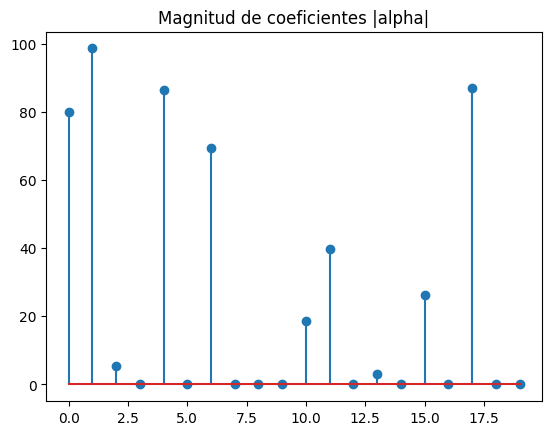

In [16]:
def mincua_reg(X, y, lam_=1e-3):
    """
    Solución cerrada de la regresión Ridge:
    alpha = (X^T X + λI)^(-1) X^T y
    """
    alpha = np.linalg.inv(X.T.dot(X) + lam_ * np.eye(X.shape[1])).dot(X.T).dot(y)
    return alpha

# Estimamos coeficientes
alpha = mincua_reg(X, y)

print("Coeficientes alpha:", alpha)

# Representamos magnitud de los coeficientes
plt.stem(np.abs(alpha))
plt.title("Magnitud de coeficientes |alpha|")
plt.show()


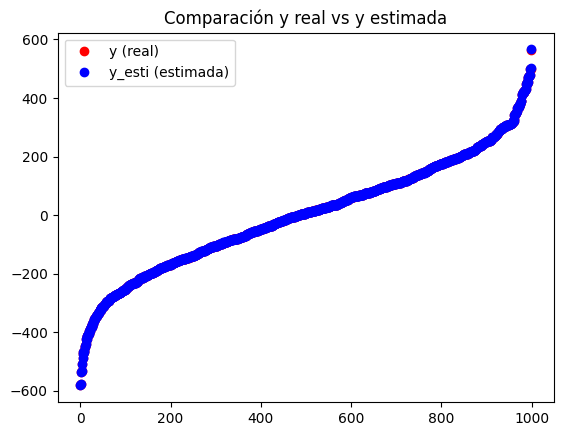

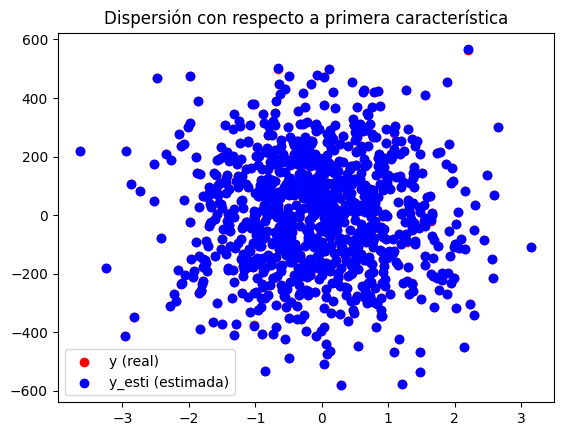

In [17]:
# Estimación de y
y_esti = X.dot(alpha)

# Comparación ordenada
plt.plot(y[ind_], "o", c="r", label="y (real)")
plt.plot(y_esti[ind_], "o", c="b", label="y_esti (estimada)")
plt.legend()
plt.title("Comparación y real vs y estimada")
plt.show()

# Gráfico de dispersión respecto a una característica
plt.scatter(X[ind_, 0], y, c="r", marker="o", label="y (real)")
plt.scatter(X[ind_, 0], y_esti, c="b", marker="o", label="y_esti (estimada)")
plt.legend()
plt.title("Dispersión con respecto a primera característica")
plt.show()


In [18]:
from sklearn.datasets import fetch_california_housing

# Cargamos datos reales de viviendas en California
housing = fetch_california_housing()

print("Forma de X:", housing.data.shape)
print("Forma de y:", housing.target.shape)
print("Primeras 6 características:", housing.feature_names[:6])

X_house = housing.data
y_house = housing.target


Forma de X: (20640, 8)
Forma de y: (20640,)
Primeras 6 características: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


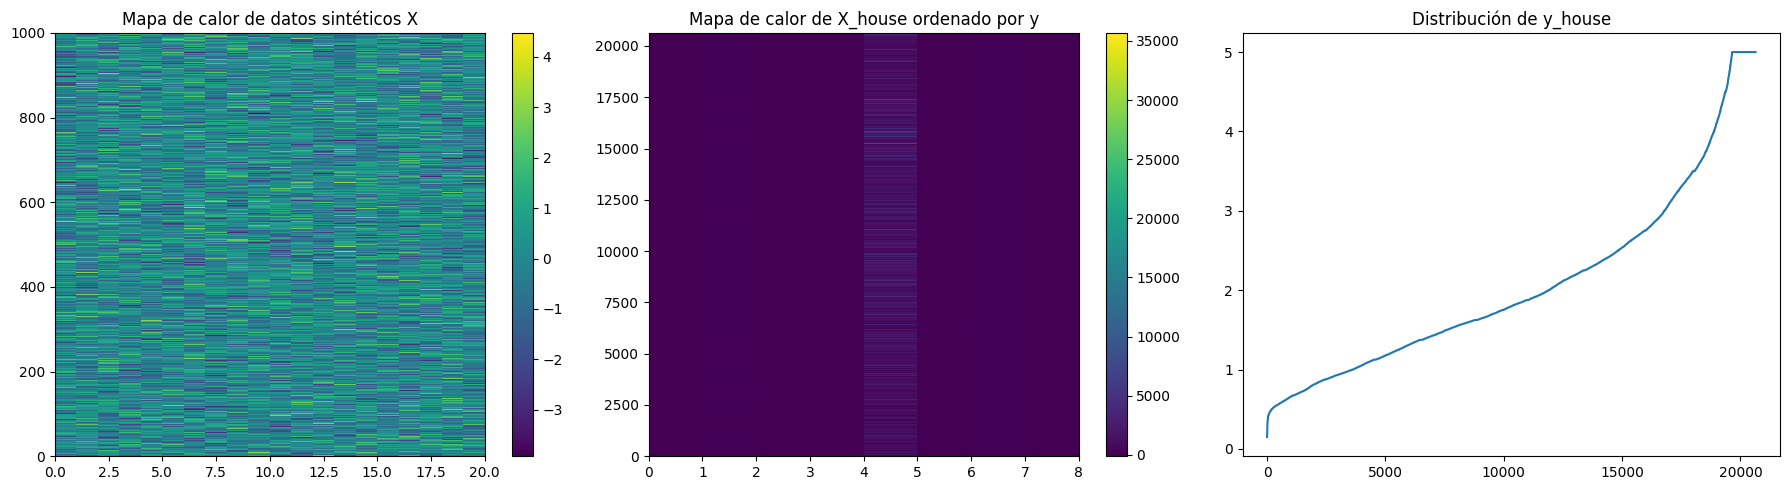

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Subplot 1: Mapa de calor de X ---
c1 = axes[0].pcolormesh(X)
fig.colorbar(c1, ax=axes[0])
axes[0].set_title("Mapa de calor de datos sintéticos X")

# --- Subplot 2: Mapa de calor de X_house ordenado ---
ind_ = np.argsort(y_house)
c2 = axes[1].pcolormesh(X_house[ind_])
fig.colorbar(c2, ax=axes[1])
axes[1].set_title("Mapa de calor de X_house ordenado por y")

# --- Subplot 3: Distribución de y_house ---
axes[2].plot(y_house[ind_])
axes[2].set_title("Distribución de y_house")

plt.tight_layout()
plt.show()


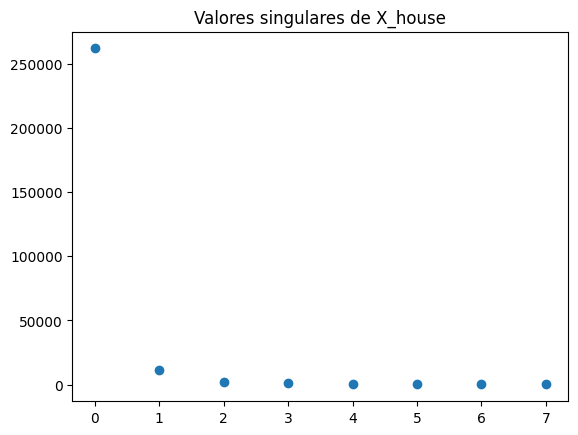

In [20]:
# Descomposición SVD de X_house
U, S, Vh = np.linalg.svd(X_house)

# Visualizamos valores singulares
plt.scatter(np.arange(len(S)), S)
plt.title("Valores singulares de X_house")
plt.show()



Coeficientes alpha: [ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


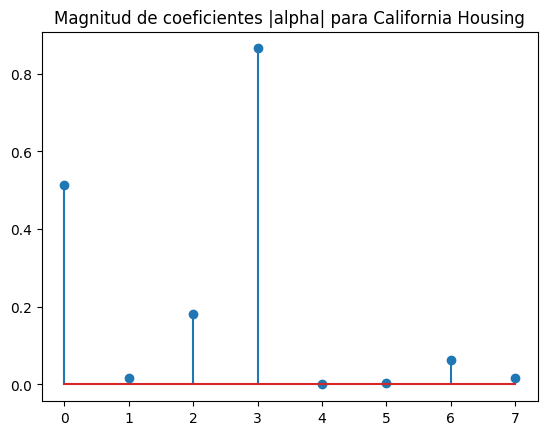

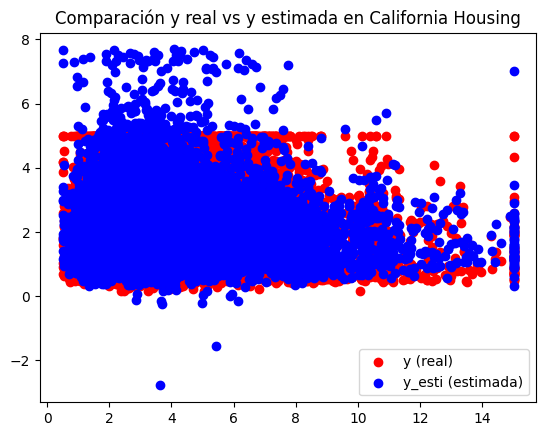

In [21]:
# Calculamos coeficientes alpha con solución cerrada
alpha = mincua_reg(X_house, y_house)

print("Coeficientes alpha:", alpha)

# Magnitud de coeficientes
plt.stem(np.abs(alpha))
plt.title("Magnitud de coeficientes |alpha| para California Housing")
plt.show()

# Estimación de y
y_estimada = X_house.dot(alpha)

# Comparación gráfica
plt.scatter(X_house[ind_, 0], y_house, c="r", marker="o", label="y (real)")
plt.scatter(X_house[ind_, 0], y_estimada, c="b", marker="o", label="y_esti (estimada)")
plt.legend()
plt.title("Comparación y real vs y estimada en California Housing")
plt.show()


# **Alpha y gradiente descendiente**

In [22]:
def ridge_grad_desc(X, y, lam=1e-3, lr=1e-3, n_iter=1000):
    """
    Estima coeficientes alpha usando gradiente descendente para regresión Ridge.

    Parámetros:
    X: matriz de datos (N, P)
    y: vector objetivo (N,)
    lam: regularización λ
    lr: tasa de aprendizaje
    n_iter: número de iteraciones

    Retorna:
    alpha: coeficientes ajustados
    """
    N, P = X.shape
    alpha = np.zeros(P)  # inicializamos coeficientes

    for i in range(n_iter):
        # Cálculo del gradiente
        grad = -2 * X.T.dot(y - X.dot(alpha)) + 2 * lam * alpha
        # Actualización de coeficientes
        alpha -= lr * grad

    return alpha


In [23]:
# Solución cerrada
alpha_closed = mincua_reg(X, y)

# Solución con gradiente descendente
alpha_gd = ridge_grad_desc(X, y, lam=1e-3, lr=1e-5, n_iter=5000)

print("Solución cerrada (primeros 5 coef):", alpha_closed[:5])
print("Gradiente descendente (primeros 5 coef):", alpha_gd[:5])


Solución cerrada (primeros 5 coef): [8.00015870e+01 9.85791489e+01 5.56725661e+00 2.42188895e-03
 8.64660571e+01]
Gradiente descendente (primeros 5 coef): [8.00015870e+01 9.85791489e+01 5.56725661e+00 2.42188895e-03
 8.64660571e+01]


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones con ambos métodos
y_pred_closed = X.dot(alpha_closed)
y_pred_gd = X.dot(alpha_gd)

# Métricas
mse_closed = mean_squared_error(y, y_pred_closed)
mse_gd = mean_squared_error(y, y_pred_gd)

r2_closed = r2_score(y, y_pred_closed)
r2_gd = r2_score(y, y_pred_gd)

print("MSE solución cerrada:", mse_closed)
print("MSE gradiente descendente:", mse_gd)
print("R² solución cerrada:", r2_closed)
print("R² gradiente descendente:", r2_gd)


MSE solución cerrada: 0.01019538414730517
MSE gradiente descendente: 0.01019538414730538
R² solución cerrada: 0.9999997310654929
R² gradiente descendente: 0.9999997310654929


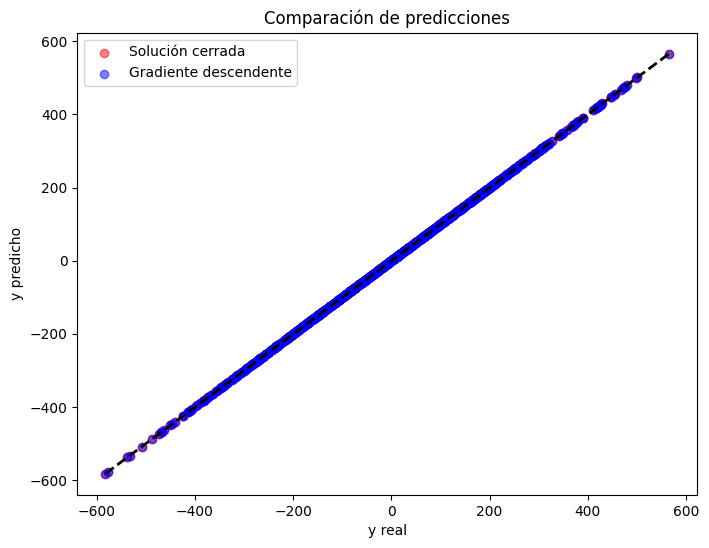

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_closed, c="r", alpha=0.5, label="Solución cerrada")
plt.scatter(y, y_pred_gd, c="b", alpha=0.5, label="Gradiente descendente")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.legend()
plt.title("Comparación de predicciones")
plt.show()
